# Title: Prediction for Credit Card Approval
## Author: Kaleem u Allah

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Step 1: Exploratory Data Analysis (EDA)

In [2]:
# Load the train and test data
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [3]:
train_df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [4]:
test_df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [7]:
# View the summary statistics of the train dataset
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,29165.0,5.078232e+06,41824.000708,5008804.0,5042047.0,5074666.0,5114629.0,5150485.0
Children count,29165.0,4.307903e-01,0.741882,0.0,0.0,0.0,1.0,19.0
Income,29165.0,1.868904e+05,101409.644327,27000.0,121500.0,157500.0,225000.0,1575000.0
Age,29165.0,-1.597948e+04,4202.997485,-25152.0,-19444.0,-15565.0,-12475.0,-7705.0
Employment length,29165.0,5.925776e+04,137655.883458,-15713.0,-3153.0,-1557.0,-412.0,365243.0
Has a mobile phone,29165.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
Has a work phone,29165.0,2.243100e-01,0.417134,0.0,0.0,0.0,0.0,1.0
Has a phone,29165.0,2.949769e-01,0.456040,0.0,0.0,0.0,1.0,1.0
Has an email,29165.0,9.027944e-02,0.286587,0.0,0.0,0.0,0.0,1.0
Family member count,29165.0,2.197531e+00,0.912189,1.0,2.0,2.0,3.0,20.0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

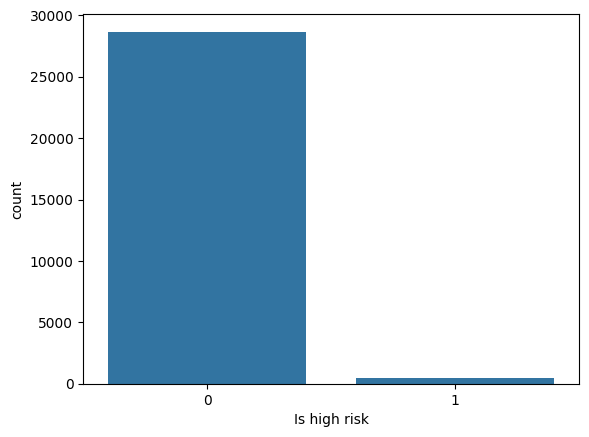

In [9]:
# Perform univariate analysis on the train dataset
sns.countplot(x='Is high risk', data=train_df)
plt.show()

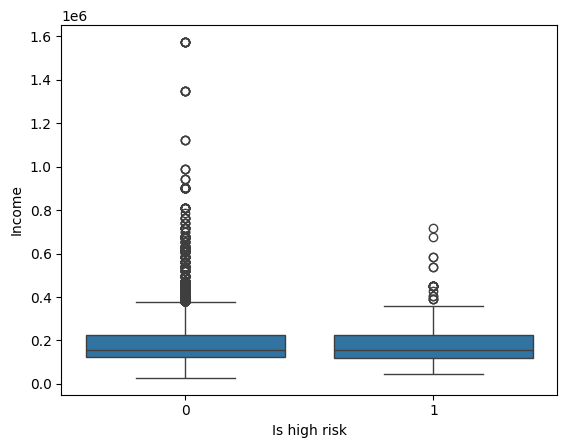

In [10]:
# Perform bivariate analysis on the train dataset
sns.boxplot(x='Is high risk', y='Income', data=train_df)
plt.show()

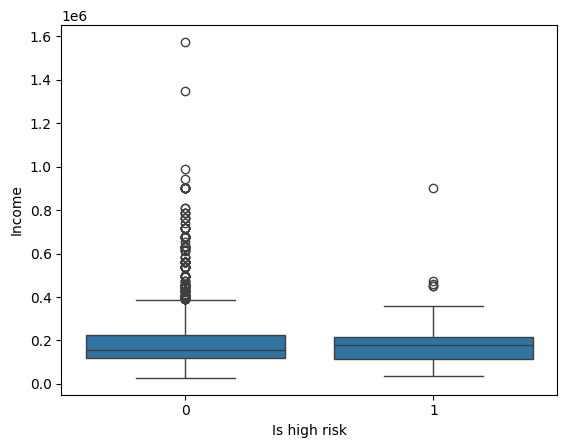

In [11]:
# Perform bivariate analysis on the test dataset
sns.boxplot(x='Is high risk', y='Income', data=test_df)
plt.show()

In [15]:
# Remove outliers using the IQR method
Q1 = train_df['Income'].quantile(0.25)
Q3 = train_df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_df = train_df[(train_df['Income'] >= lower_bound) & (train_df['Income'] <= upper_bound)]

In [13]:
# Remove outliers using the IQR method
Q1 = test_df['Income'].quantile(0.25)
Q3 = test_df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

test_df = test_df[(test_df['Income'] >= lower_bound) & (test_df['Income'] <= upper_bound)]

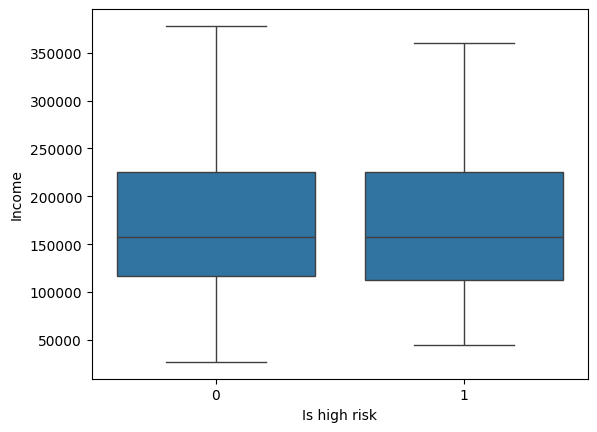

In [16]:
# Perform bivariate analysis on the train dataset
sns.boxplot(x='Is high risk', y='Income', data=train_df)
plt.show()

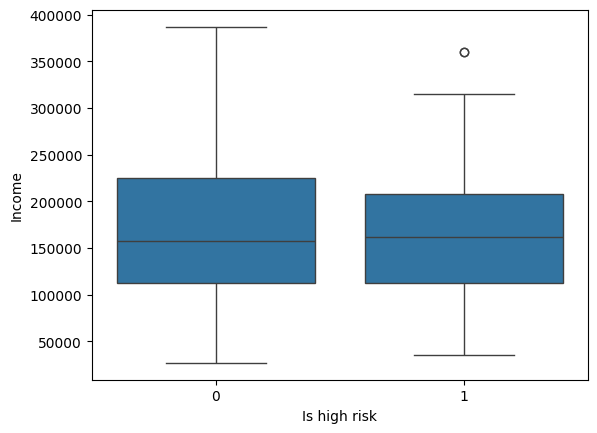

In [17]:
# Perform bivariate analysis on the test dataset
sns.boxplot(x='Is high risk', y='Income', data=test_df)
plt.show()

# Step 2: Feature Engineering

In [18]:
# Create new features or transform existing ones as necessary
train_df['IncomePerChild'] = train_df['Income'] / (train_df['Children count'] + 1)
test_df['IncomePerChild'] = test_df['Income'] / (test_df['Children count'] + 1)

# Step 3: Data Preprocessing

In [19]:
# Check the missing values in the train dataset
print(train_df.isnull().sum())
print(test_df.isnull().sum())

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              8723
Family member count       0
Account age               0
Is high risk              0
IncomePerChild            0
dtype: int64
ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a p

In [20]:
# Handle missing values in both train and test datasets
train_df = train_df.dropna()
test_df = test_df.dropna()

In [21]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
IncomePerChild         0
dtype: int64
ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age 

# Encode categorical variables in both train and test datasets

In [22]:
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 
                    'Dwelling', 'Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email', 'Job title']

for col in categorical_cols:
    train_df.loc[:, col] = label_encoder.fit_transform(train_df.loc[:, col])
    test_df.loc[:, col] = label_encoder.transform(test_df.loc[:, col])

In [23]:
# Split the train dataset into train and validation sets
X_train = train_df.drop(['ID', 'Is high risk'], axis=1)
y_train = train_df['Is high risk']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 4: Machine Learning Model Development

In [24]:
# Train various classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [25]:
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)

In [26]:
# Remove the target variable 'Is high risk' from the test dataset
X_test = test_df.drop(['ID', 'Is high risk'], axis=1)

# Preprocess the test dataset
for col in categorical_cols:   
    # Handle unseen labels in the test dataset
    unseen_labels = set(X_test[col]) - set(label_encoder.classes_)
    for label in unseen_labels:
        label_encoder.classes_ = np.append(label_encoder.classes_, label)

    # Transform the categorical variables using label_encoder
    X_test[col] = label_encoder.transform(X_test[col])

# Make predictions on the test dataset
y_pred_test = model.predict(X_test)

# Step 5: Model Evaluation and testing

In [27]:
# Make predictions on the test dataset
y_pred_test = model.predict(X_test)

In [30]:
# Evaluate the model on the test dataset
accuracy = accuracy_score(test_df['Is high risk'], y_pred_test)
precision = precision_score(test_df['Is high risk'], y_pred_test)
recall = recall_score(test_df['Is high risk'], y_pred_test)
f1 = f1_score(test_df['Is high risk'], y_pred_test)
auc_roc = roc_auc_score(test_df['Is high risk'], y_pred_test)

print(f"Model: {model_name}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {auc_roc}")
print("\n")

Model: Gradient Boosting
Accuracy: 0.973563696919234
Precision: 0.07936507936507936
Recall: 0.06756756756756757
F1-Score: 0.07299270072992702
AUC-ROC: 0.5276527055596822




In [33]:
test_df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,...,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk,IncomePerChild
0,5091261,0,0,1,0,202500.0,2,4,2,1,...,-1692,0,0,0,0,11,1.0,-6.0,0,202500.0
2,5087880,0,0,0,0,234000.0,2,1,0,1,...,-5215,0,0,0,1,3,2.0,-52.0,0,234000.0
4,5105705,0,1,0,0,225000.0,4,4,1,2,...,-667,0,0,0,0,8,2.0,-48.0,0,225000.0
5,5029195,0,0,1,0,94500.0,4,4,1,1,...,-617,0,0,0,0,8,2.0,-18.0,0,94500.0
7,5051050,1,1,0,0,67500.0,4,4,1,1,...,-2174,0,0,0,0,8,2.0,-9.0,0,67500.0


In [35]:
# Check the prediction on test dataset
model.predict([[0,0,1,0,202500.0,2,4,2,1,-1692,0,0,0,0,11,1.0,-6.0,0,202500.0]])

C:\Users\Kaleem KM\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [36]:
# Save the model
import pickle
pickle.dump(model, open('credit_card_model.pkl', 'wb'))

In [37]:
# Save the label encoder in pickle
pickle.dump(label_encoder, open('label_encoder.pkl', 'wb'))